# Build Personal accounting system using firefly iii

This is a  tutorial for setting up a personal accounting system using Firefly III along with its Data Importer. You’ll be using Docker and Docker Compose to run everything in containers for easy setup and management. Let’s go!

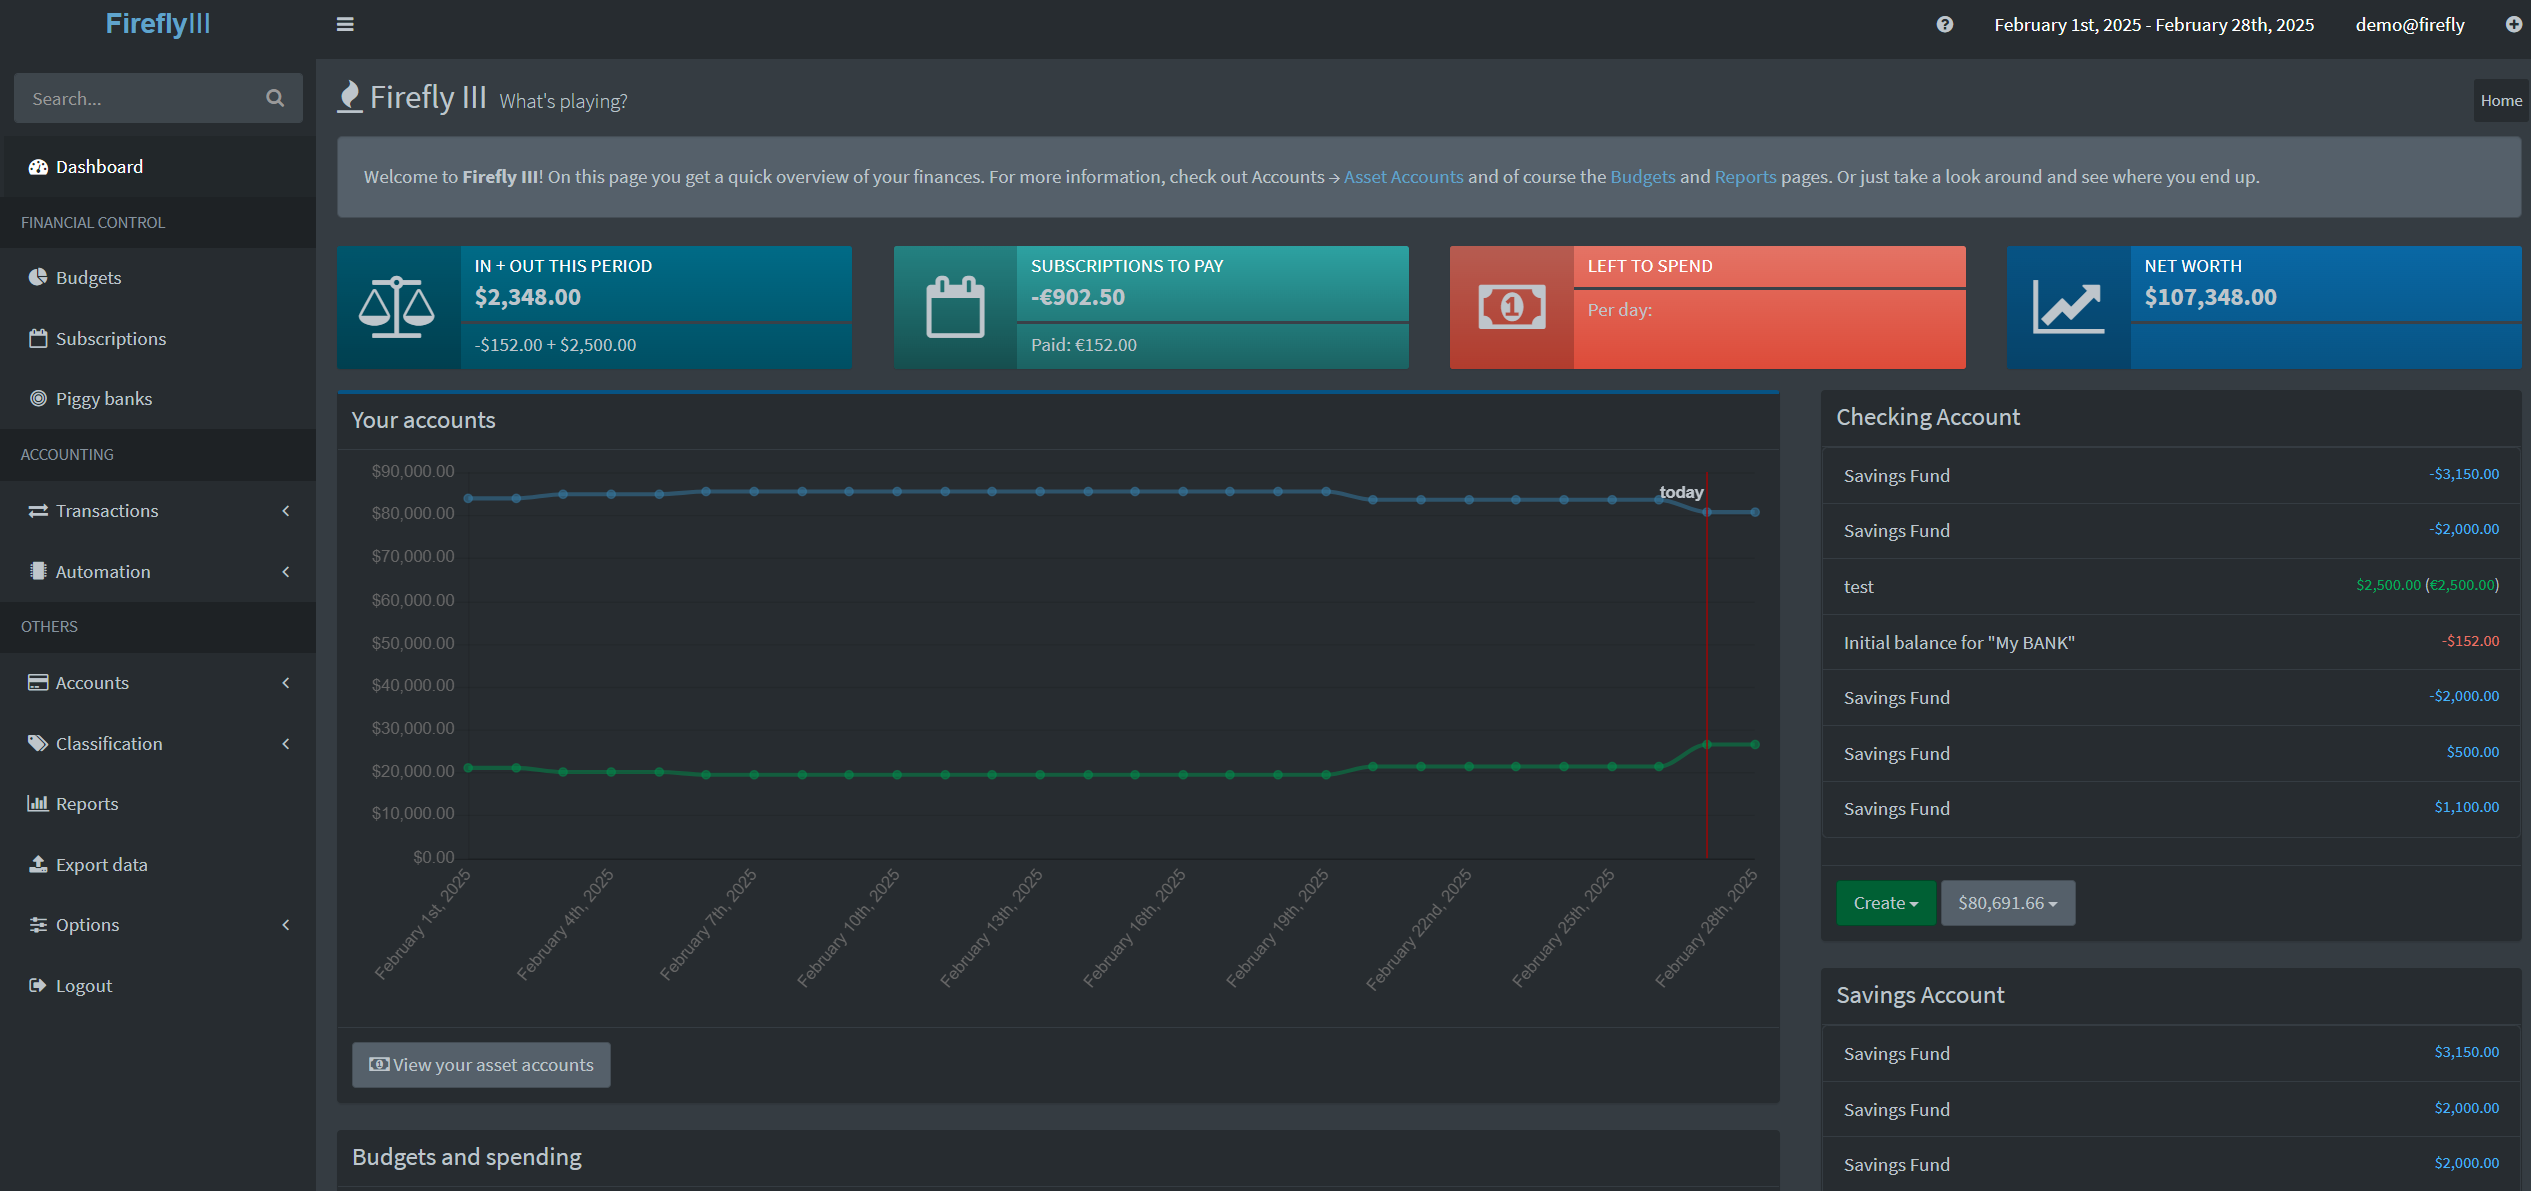

## Check Docker Installation
- First things first, make sure Docker is installed on your machine. On Ubuntu/Debian-based systems, you can run:

    ```bash
    docker --version
    ```

- If it says something like `Docker version 2x.x.x`, you’re good to go. Otherwise, install Docker:

    ```bash
    sudo apt-get update
    sudo apt-get install docker.io
    sudo systemctl start docker
    sudo systemctl enable docker
    ```

## Create a “firefly-iii” Directory & Download the Necessary Files

- Make a project folder so it’s easy to keep everything in one place:

    ```bash
    mkdir firefly-iii
    cd firefly-iii
    ```

- Now, download the required configuration and environment files:

    ```bash
    # 2.1 Download the Docker-Compose file that includes the Firefly Data Importer
    wget -O docker-compose.yml https://raw.githubusercontent.com/firefly-iii/docker/main/docker-compose-importer.yml

    # 2.2 Download the Firefly III environment file
    wget -O env.yml https://raw.githubusercontent.com/firefly-iii/firefly-iii/main/.env.example

    # 2.3 Download the Data Importer environment file
    wget -O importer.env.yml https://raw.githubusercontent.com/firefly-iii/data-importer/main/.env.example

    # 2.4 Download the database environment file
    wget -O db.env.yml https://raw.githubusercontent.com/firefly-iii/docker/main/database.env
    ```

    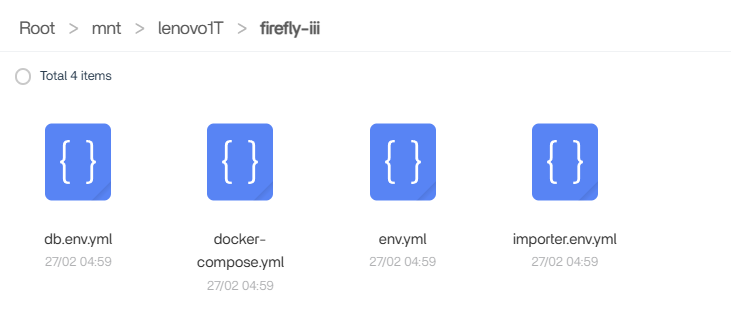

### What Are These Files?

- `docker-compose.yml`

  - Describes all the services (`Firefly III`, `data importer`, `database`, etc.) and how they work together.

  - Tells Docker which images to pull, which ports to expose, and how to link containers.

- `env.yml` (Firefly III environment)

  - Holds Firefly III’s configuration details, such as the app key, database settings, time zone, etc.
  
- `importer.env.yml` (Data Importer environment)
  
  - Holds environment variables just for the Data Importer—like the URL to your Firefly III instance and its app key (if separate).

- `db.env.yml` (Database environment)

  - Contains credentials and DB name/host for the `MariaDB` or `MySQL` container (username, password, etc.).
  
  - Firefly III and the importer can pull these credentials so you only have to set them in one place.

##  Edit the Environment Files

We’ll customize each environment file so that `Firefly III`, the `importer`, and the `database` know exactly how to talk to each other.

### `env.yml` (Main Firefly III Env)

- `APP_KEY`: Must be a random 32‐character key used for encryption.

    - You can generate one quickly with:
  
        ```bash
        openssl rand -base64 32
        ```
    - or you can use online Password generator [bitwarden](https://bitwarden.com/password-generator/#password-generator)

    - Then set it, for example

        ```bash
        APP_KEY=base64:xXg1v0VKmS+...someLongString...
        ```

- `DB_HOST`: This should match the database container name defined in your `docker-compose.yml`, often mariadb.

- `DB_PORT`: Typically 3306, MariaDB’s default.

- `DB_DATABASE`, `DB_USERNAME`, `DB_PASSWORD`: These should match the values in db.env.yml (we’ll verify that next).

- `TZ (time zone)`: Optional but recommended—set it to your local time zone, e.g. `TZ=America/New_York`.

    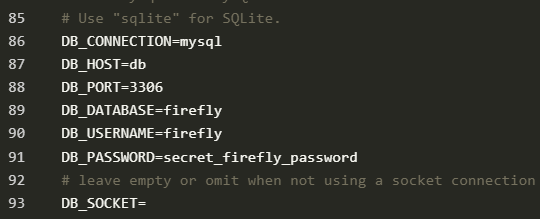

### `importer.env.yml` (Data Importer)

Common settings:

- `FIREFLY_III_URL`: If you want to hard‐code the URL to your Firefly instance. Otherwise, the importer might ask for it in the web interface.
  
- `TZ`: If the importer respects time zone settings, set it here, too.

### `db.env.yml` (Database Credentials)

- Inside, you’ll typically see:

```yml
MYSQL_ROOT_PASSWORD=changeMeRoot
MYSQL_USER=firefly
MYSQL_PASSWORD=changeMeDB
MYSQL_DATABASE=firefly
```
- `MYSQL_USER`: The username for the database (e.g., firefly).\

- `MYSQL_PASSWORD`: The password for that user (choose something secure).

- `MYSQL_DATABASE`: The name of the database (often firefly).

Make sure these align with what you expect in `env.yml`. For instance, if `env.yml` has `DB_USERNAME=firefly` and `DB_PASSWORD=changeMeDB`, then your `db.env.yml` should match that.

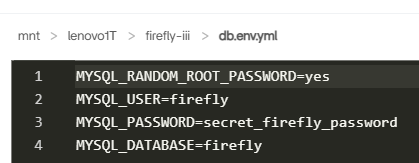

##  Rename Files 
Depending on Firefly III’s instructions or your personal preference, you need rename these environment files to the more standard “dot” versions:

- `docker-compose.yml` stays the same
- `env.yml → .env`
- `importer.env.yml → importer.env`
- `db.env.yml → db.env`

## Start Your Containers!

- Time to fire up the stack:
  
    ```bash
    docker-compose up -d
    ```

This command will:

- Pull down the Firefly III image, the Data Importer image, the MariaDB (or MySQL) image.

- Create a network for them to talk to each other.

- Start everything in the background.

Check the logs to ensure everything’s running smoothly:

```bash
docker-compose logs -f
```

Look for messages indicating that the database is ready, and Firefly III has started successfully.

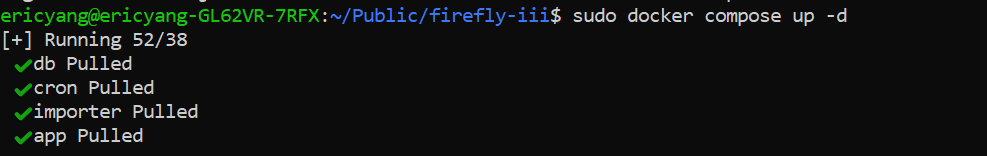

## That’s It!

You now have a personal accounting system running via Firefly III, with a Data Importer to automate or streamline imports from your bank, CSVs, or other financial data sources.

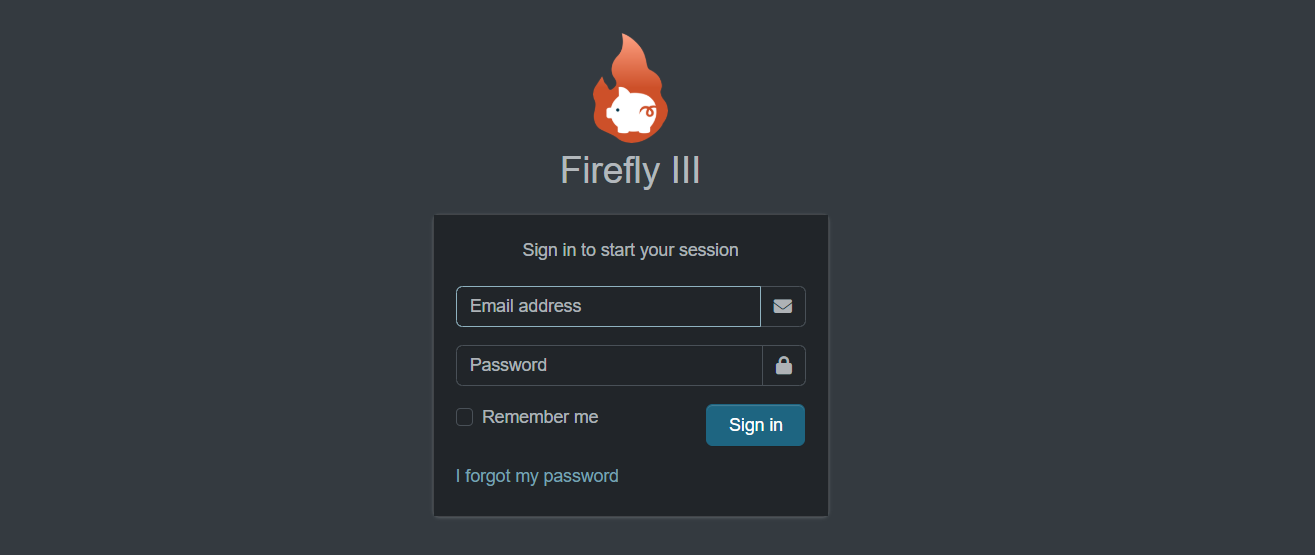

- **Next Steps** might include enabling HTTPS, integrating with personal finance tools, or exploring Firefly III’s budgets, recurring transactions, and reporting features.
  
- **Maintenance** is as simple as pulling the latest images and running `docker-compose up -d --build` whenever there’s an update.

Enjoy your new self-hosted financial management setup—happy budgeting!